In [1]:
import os
os.getcwd()

'C:\\Users\\Vishal Gardas\\Desktop\\Programming\\P work\\NLPS papers'

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
authors = pd.read_csv("Authors.csv")
paper_authors = pd.read_csv("PaperAuthors.csv")
papers = pd.read_csv("Papers.Csv")

In [5]:
authors.head()

,Id,Name
0,3967,Yi Zhang
1,3087,Aurelie C. Lozano
2,3039,Dustin Lang
3,6551,Xinghao Pan
4,8262,Theophane Weber


In [6]:
paper_authors.head()

,Id,PaperId,AuthorId
0,1,5677,7956
1,2,5677,2649
2,3,5941,8299
3,4,5941,8300
4,5,5941,575


In [14]:
papers.head()

,Id,Title,EventType,PdfName,Abstract,PaperText
0,5677,Double or Nothing: Multiplicative Incentive Me...,Poster,5677-double-or-nothing-multiplicative-incentiv...,Crowdsourcing has gained immense popularity in...,Double or Nothing: Multiplicative\nIncentive M...
1,5941,Learning with Symmetric Label Noise: The Impor...,Spotlight,5941-learning-with-symmetric-label-noise-the-i...,Convex potential minimisation is the de facto ...,Learning with Symmetric Label Noise: The\nImpo...
2,6019,Algorithmic Stability and Uniform Generalization,Poster,6019-algorithmic-stability-and-uniform-general...,One of the central questions in statistical le...,Algorithmic Stability and Uniform Generalizati...
3,6035,Adaptive Low-Complexity Sequential Inference f...,Poster,6035-adaptive-low-complexity-sequential-infere...,We develop a sequential low-complexity inferen...,Adaptive Low-Complexity Sequential Inference f...
4,5978,Covariance-Controlled Adaptive Langevin Thermo...,Poster,5978-covariance-controlled-adaptive-langevin-t...,Monte Carlo sampling for Bayesian posterior in...,Covariance-Controlled Adaptive Langevin\nTherm...


In [9]:
papers.describe()

,Id
count,403.000000
mean,5834.000000
std,116.480327
min,5633.000000
25%,5733.500000
50%,5834.000000
75%,5934.500000
max,6035.000000


In [13]:
papers.isnull().describe()

,Id,Title,EventType,PdfName,Abstract,PaperText
count,403,403,403,403,403,403
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,403,403,403,403,403,403


In [32]:
papers.head()

,Id,Title,PdfName,Abstract,PaperText
0,5677,Double or Nothing: Multiplicative Incentive Me...,5677-double-or-nothing-multiplicative-incentiv...,Crowdsourcing has gained immense popularity in...,Double or Nothing: Multiplicative\nIncentive M...
1,5941,Learning with Symmetric Label Noise: The Impor...,5941-learning-with-symmetric-label-noise-the-i...,Convex potential minimisation is the de facto ...,Learning with Symmetric Label Noise: The\nImpo...
2,6019,Algorithmic Stability and Uniform Generalization,6019-algorithmic-stability-and-uniform-general...,One of the central questions in statistical le...,Algorithmic Stability and Uniform Generalizati...
3,6035,Adaptive Low-Complexity Sequential Inference f...,6035-adaptive-low-complexity-sequential-infere...,We develop a sequential low-complexity inferen...,Adaptive Low-Complexity Sequential Inference f...
4,5978,Covariance-Controlled Adaptive Langevin Thermo...,5978-covariance-controlled-adaptive-langevin-t...,Monte Carlo sampling for Bayesian posterior in...,Covariance-Controlled Adaptive Langevin\nTherm...


In [35]:
papers['word_count']=papers['Abstract'].apply(lambda x:len(str(x).split(" ")))
papers[['Abstract','word_count']].head()

,Abstract,word_count
0,Crowdsourcing has gained immense popularity in...,154
1,Convex potential minimisation is the de facto ...,146
2,One of the central questions in statistical le...,168
3,We develop a sequential low-complexity inferen...,122
4,Monte Carlo sampling for Bayesian posterior in...,117


In [36]:
papers.word_count.describe()

count    403.000000
mean     148.650124
std       42.919155
min       58.000000
25%      119.000000
50%      145.000000
75%      177.500000
max      296.000000
Name: word_count, dtype: float64

In [39]:
freq = pd.Series(' '.join(papers['Abstract']).split()).value_counts()[:20]
freq

the      3086
of       2106
a        1602
and      1415
to       1342
in        931
is        815
for       769
that      765
We        589
on        567
we        514
with      455
as        392
an        376
are       370
this      361
by        314
which     314
our       291
dtype: int64

In [43]:
non_freq = pd.Series(' '.join(papers['Abstract']).split()).value_counts()[-20:]
non_freq

O(1                 1
mix                 1
(CCB),              1
translations.       1
spectral)           1
realized            1
hashes              1
wild,demonstrate    1
annotation,         1
(local              1
networks;           1
evenly              1
topic,              1
energies,           1
LRVB                1
constrast           1
asSVRG,             1
sequence.Such       1
p-values            1
one-bit             1
dtype: int64

In [81]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = 'good'
print("stemming:",stem.stem(word))
print("lemmatization:",lem.lemmatize(word))

stemming: good
lemmatization: good


In [51]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 

In [52]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [70]:
new_words= ["using", "show", "result", "large", "also",
            "iv", "one", "two", "new", "previously", "shown"]
stop_words=stop_words.union(new_words)

In [100]:
corpus=[]
for i in range(0,403):
    text=re.sub('^[a-zA-z]',' ',papers.Abstract[i])
    text=text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    text=re.sub('(\\d|\\W)',' ',text)
    list=text.split()
    ps=PorterStemmer()
    lem=WordNetLemmatizer()
    temp=[lem.lemmatize(word) for word in list if word not in stop_words]
    text=" ".join(temp)
    corpus.append(text)

In [83]:
from os import path
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

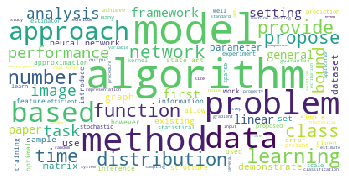

In [103]:
wordcloud = WordCloud(background_color = "white", stopwords = stop_words,
                     max_words = 100,
                     max_font_size=50,
                     random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv = CountVectorizer(max_df=0.8, stop_words = stop_words, max_features = 1000, ngram_range=(1,3))
x = cv.fit_transform(corpus)

[Text(0, 0, 'algorithm'),
 Text(0, 0, 'model'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'method'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'data'),
 Text(0, 0, 'network'),
 Text(0, 0, 'approach'),
 Text(0, 0, 'based'),
 Text(0, 0, 'time'),
 Text(0, 0, 'bound'),
 Text(0, 0, 'function'),
 Text(0, 0, 'result'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'propose'),
 Text(0, 0, 'inference'),
 Text(0, 0, 'number'),
 Text(0, 0, 'performance'),
 Text(0, 0, 'matrix')]

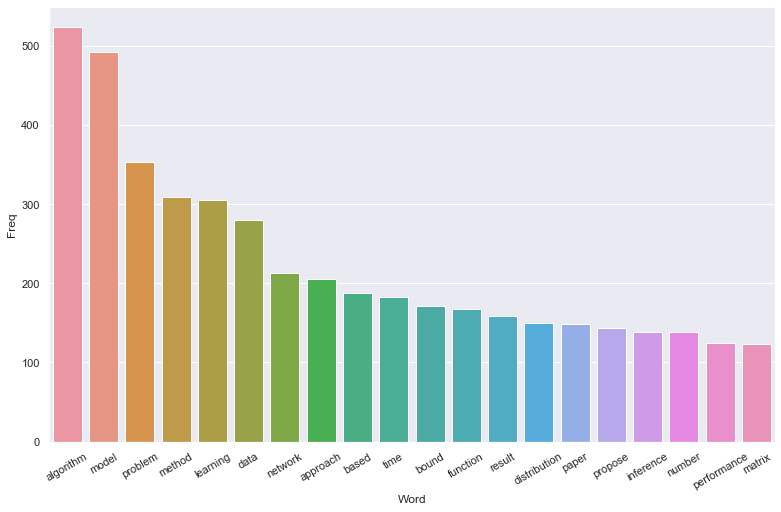

In [113]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                  Bi-gram  Freq
0          neural network    76
1               state art    70
2        machine learning    55
3              real world    46
4             lower bound    42
5     stochastic gradient    38
6                low rank    38
7        high dimensional    36
8      learning algorithm    34
9             monte carlo    30
10       gradient descent    28
11       convergence rate    28
12       generative model    24
13        latent variable    23
14       learning problem    23
15  variational inference    22
16          paper present    22
17          paper propose    21
18               data set    20
19           markov chain    20


[Text(0, 0, 'neural network'),
 Text(0, 0, 'state art'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'lower bound'),
 Text(0, 0, 'stochastic gradient'),
 Text(0, 0, 'low rank'),
 Text(0, 0, 'high dimensional'),
 Text(0, 0, 'learning algorithm'),
 Text(0, 0, 'monte carlo'),
 Text(0, 0, 'gradient descent'),
 Text(0, 0, 'convergence rate'),
 Text(0, 0, 'generative model'),
 Text(0, 0, 'latent variable'),
 Text(0, 0, 'learning problem'),
 Text(0, 0, 'variational inference'),
 Text(0, 0, 'paper present'),
 Text(0, 0, 'paper propose'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'markov chain')]

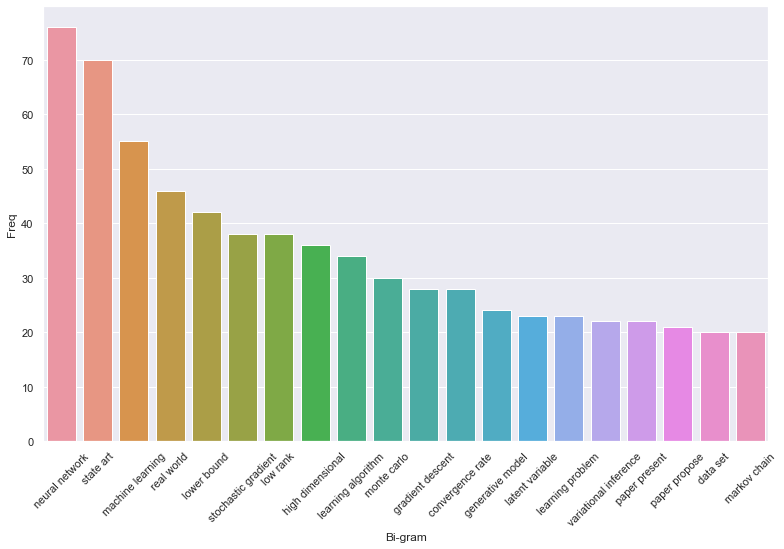

In [112]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [110]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(x)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[123]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [111]:
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
        results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
n important class problem involves training deep neural network sparse prediction target high dimension occur naturally e g neural language model learning word embeddings often posed predicting probability next word among vocabulary size e g computing equally typically non sparse dimensional output vector last hidden layer reasonable dimension e g incurs prohibitive dd computational cost example updating time output weight matrix computing gradient needed backpropagation previous layer efficient handling sparse network input trivial case sparse target thus far sidestepped approximate alternative hierarchical softmax sampling based approximation training work develop original algorithmic approach family loss function includes squared error spherical softmax compute exact loss gradient update output weight gradient backpropagation per example instead dd remarkably without ever computing dimensional output proposed algorithm yield speedup frac e order magnitude typical size cri